## Imports

In [23]:
import numpy as np 
import pandas as pd
from PyUtils import MyPyUtils as utils
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

In [24]:
filePath = "churn_raw.csv"
df = pd.read_csv(filePath, index_col=0)
df

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,...,169.974100,4159.305799,4,4,4,4,4,4,4,5


In [25]:
df.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [26]:
#Remove granular columns
df = df.drop(columns=['Customer_id', 'Interaction', 'UID', 'City', 'State', 
       'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])
print(df.shape)
df.info()
utils.writeDFToFile(df, "df_info_1.txt")
df.to_csv('churn_D208-2.csv')

(10000, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet 

In [27]:
categorical_features = df.select_dtypes(include=['object']).columns.to_list()
print("\nCategorical features")
print(categorical_features)
print("\n")

df_dichotomized = pd.get_dummies(data=df, columns=categorical_features, drop_first=True)
df_dichotomized.info()
utils.writeDFToFile(df_dichotomized, "df_info_2.txt")

df_dichotomized.to_csv('df_dichotomized_data.csv')


Categorical features
['Area', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  int64  
 1   Children                               10000 non-null  int64  
 2   Age                                    10000 non-null  int64  
 3   Income                                 10000 non-null  float64
 4   Outage_sec_perweek                     10000 non-null  float64
 5   Email                                  10000 non-null  int64  
 6   Contacts                               10000 non-null

# Summary Statistics

In [28]:
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [29]:
# Summary for categorial data
categorical_summary = df.describe(include='object')
categorical_summary.to_csv("univariate_categorical_summary.csv")
categorical_summary

,Area,Marital,Gender,Churn,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,5,3,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,4
top,Suburban,Divorced,Female,No,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes,Electronic Check
freq,3346,2092,5025,7350,8321,5456,5166,7009,4408,9067,5392,6424,5494,5614,6250,5071,5110,5882,3398


# Sampling Data

In [30]:
# 80% Trainig sample , 30% Test sample
target = 'Churn_Yes'
Y = df_dichotomized[target] #target
X = df_dichotomized.drop(target, axis=1) #Predictors
split_by = Y
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=split_by)
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (7000, 38)
y_train: (7000,)
x_test: (3000, 38)
y_test: (3000,)


## Logistic Regression


coef_
{'Population': -0.0, 'Children': -0.0237, 'Age': -0.0042, 'Income': -0.0, 'Outage_sec_perweek': -0.1348, 'Email': -0.1659, 'Contacts': -0.0121, 'Yearly_equip_failure': -0.0063, 'Tenure': -0.1256, 'MonthlyCharge': 0.0234, 'Bandwidth_GB_Year': 0.0007, 'Area_Suburban': -0.0064, 'Area_Urban': -0.0035, 'Marital_Married': -0.0033, 'Marital_Never Married': -0.0041, 'Marital_Separated': -0.0012, 'Marital_Widowed': -0.0016, 'Gender_Male': -0.0022, 'Gender_Nonbinary': -0.0006, 'Techie_Yes': 0.0039, 'Contract_One year': -0.0194, 'Contract_Two Year': -0.0226, 'Port_modem_Yes': -0.0055, 'Tablet_Yes': -0.0047, 'InternetService_Fiber Optic': -0.0249, 'InternetService_None': -0.004, 'Phone_Yes': -0.0131, 'Multiple_Yes': 0.002, 'OnlineSecurity_Yes': -0.0059, 'OnlineBackup_Yes': -0.0032, 'DeviceProtection_Yes': -0.0033, 'TechSupport_Yes': -0.0051, 'StreamingTV_Yes': 0.0146, 'StreamingMovies_Yes': 0.0186, 'PaperlessBilling_Yes': -0.0081, 'PaymentMethod_Credit Card (automatic)': -0.0032, 'PaymentMe

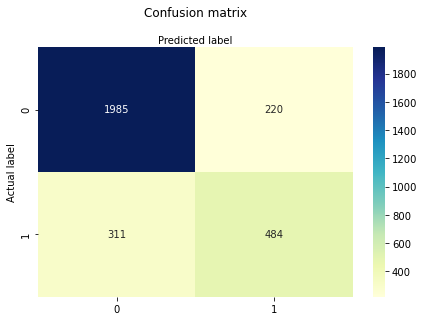

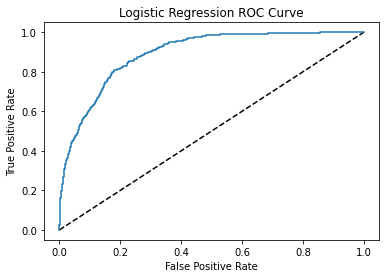

In [31]:
model1 = LogisticRegression(solver='lbfgs', max_iter=500)
model1.fit(x_train, y_train)

print("\ncoef_")
# print(model.coef_[0])
coefs_dict = dict(zip(x_train.columns, model1.coef_[0]))
rounded_coefs = {key: round(value, 4) for key, value in coefs_dict.items()}
print(rounded_coefs)

print("\nintercept_")
print(model1.intercept_)

y_formula = "y = " + str(model1.intercept_) + " + "
for key, value in coefs_dict.items():
    y_formula += f"{round(value,4)}*{key} + "
print("\nY_formula")
print(y_formula)

print("\nscore_")
score = model1.score(x_test, y_test)
print(score)

y_predicted = model1.predict(x_test)
print("\ny_predict")
print(y_predicted)

print("\ny_predict_proba")
y_predicted_proba = model1.predict_proba(x_test)
print(y_predicted_proba)

print("TP | FP \nFN | TN \n")
cm1 = confusion_matrix(y_test, y_predicted)
utils.plot_confusion_matrix(cm1)

utils.plot_roc_curve(model1,x_test,y_test)


In [32]:
print("\nClassification Report")
report1 = classification_report(y_test,y_predicted)
print(report1)


Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2205
           1       0.69      0.61      0.65       795

    accuracy                           0.82      3000
   macro avg       0.78      0.75      0.76      3000
weighted avg       0.82      0.82      0.82      3000



Accuracy = TP+TN / TP+TN+FP+FN

## Feature Selection

In [33]:
import statsmodels.api as sm
# Fit the model using maximum likelihood
logit_model = sm.Logit(y_train, x_train).fit()
print(logit_model.summary())

with open('model_summary1.txt', 'w') as fh:
        fh.write(logit_model.summary().as_text())     
        print("\nModel summary saved on model_summary1.txt")  

Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6962
Method:                           MLE   Df Model:                           37
Date:                Fri, 06 Oct 2023   Pseudo R-squ.:                     inf
Time:                        04:44:13   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Population                             3.182e-07   3.27e-06

/Users/dayanaviana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/dayanaviana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/dayanaviana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/dayanaviana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


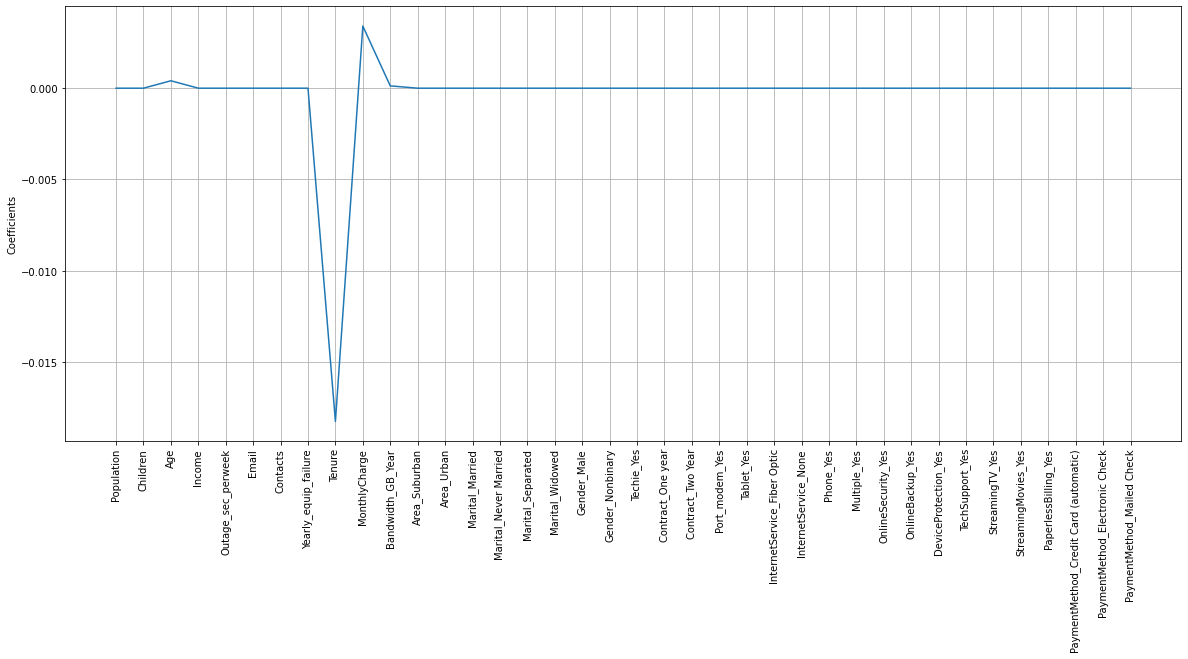

In [34]:
x = x_train
y = y_train
candidates_columns = X.columns
utils.lasso_for_feature(x, y, candidates_columns)

## Clean Data
Removing columns not relevant for this analysis.

In [35]:
x_train.columns

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Area_Suburban', 'Area_Urban', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')

In [36]:
columns_to_remove = ['Population','Income', 'Outage_sec_perweek', 'Email', 'Contacts', 
                     'Yearly_equip_failure', 'Area_Suburban', 'Area_Urban', 'Marital_Married','Marital_Never Married', 
                     'Marital_Separated', 'Marital_Widowed', 'Gender_Nonbinary', 'Port_modem_Yes', 'Tablet_Yes', 
                     'Phone_Yes', 'Multiple_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)',
                     'PaymentMethod_Mailed Check']

x_train_reduced = x_train.drop(columns=columns_to_remove)
x_test_reduced = x_test.drop(columns=columns_to_remove)

print(x_train_reduced.shape)
print(x_train_reduced.columns)

(7000, 18)
Index(['Children', 'Age', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Gender_Male', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year',
       'InternetService_Fiber Optic', 'InternetService_None',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaymentMethod_Electronic Check'],
      dtype='object')


In [37]:
import statsmodels.api as sm
# Fit the model using maximum likelihood
logit_model_2 = sm.Logit(y_train, x_train_reduced).fit()
print(logit_model_2.summary())

with open('model_summary2.txt', 'w') as fh:
        fh.write(logit_model_2.summary().as_text())     
        print("\nModel summary saved on model_summary2.txt")  

Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6982
Method:                           MLE   Df Model:                           17
Date:                Fri, 06 Oct 2023   Pseudo R-squ.:                     inf
Time:                        04:45:45   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Children                           0.4978      0.039     12.914      0.00

/Users/dayanaviana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/dayanaviana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/dayanaviana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/dayanaviana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


## Logistic Regression (Refined Model)

/Users/dayanaviana/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



coef_
{'Children': 0.0195, 'Age': 0.0005, 'Tenure': -0.0459, 'MonthlyCharge': 0.0437, 'Bandwidth_GB_Year': -0.0008, 'Gender_Male': 0.2006, 'Techie_Yes': 1.1992, 'Contract_One year': -3.0376, 'Contract_Two Year': -3.0507, 'InternetService_Fiber Optic': -2.3976, 'InternetService_None': -1.0488, 'OnlineSecurity_Yes': -0.0956, 'OnlineBackup_Yes': -0.1279, 'DeviceProtection_Yes': -0.0915, 'TechSupport_Yes': -0.1871, 'StreamingTV_Yes': 1.1799, 'StreamingMovies_Yes': 1.2896, 'PaymentMethod_Electronic Check': 0.3288}

intercept_
[-5.13621863]

Y_formula
y = [-5.13621863] + 0.0195*Children + 0.0005*Age + -0.0459*Tenure + 0.0437*MonthlyCharge + -0.0008*Bandwidth_GB_Year + 0.2006*Gender_Male + 1.1992*Techie_Yes + -3.0376*Contract_One year + -3.0507*Contract_Two Year + -2.3976*InternetService_Fiber Optic + -1.0488*InternetService_None + -0.0956*OnlineSecurity_Yes + -0.1279*OnlineBackup_Yes + -0.0915*DeviceProtection_Yes + -0.1871*TechSupport_Yes + 1.1799*StreamingTV_Yes + 1.2896*StreamingMovies_Y

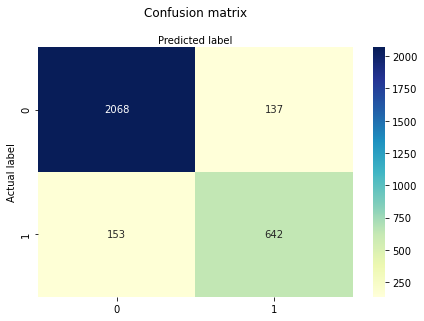

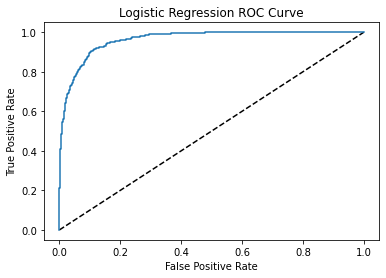

In [38]:
model_final = LogisticRegression(solver='lbfgs', max_iter=500)
model_final.fit(x_train_reduced, y_train)

print("\ncoef_")
# print(model.coef_[0])
coefs_dict = dict(zip(x_train_reduced.columns, model_final.coef_[0]))
rounded_coefs = {key: round(value, 4) for key, value in coefs_dict.items()}
print(rounded_coefs)

print("\nintercept_")
print(model_final.intercept_)

y_formula = "y = " + str(model_final.intercept_) + " + "
for key, value in coefs_dict.items():
    y_formula += f"{round(value,4)}*{key} + "
print("\nY_formula")
print(y_formula)

print("\nscore_")
score = model_final.score(x_train_reduced, y_train)
print(score)

y_predicted = model_final.predict(x_test_reduced)
y_predicted_proba = model_final.predict_proba(x_test_reduced)

print("\nClassification Report")
report2 = classification_report(y_test,y_predicted)
print(report2)

print("TP | FP \nFN | TN \n")
cm2 = confusion_matrix(y_test, y_predicted)
utils.plot_confusion_matrix(cm2)

utils.plot_roc_curve(model_final,x_test_reduced,y_test)


In [39]:

feature_names = x_train_reduced.columns
feature_importance = (
	pd.DataFrame({
		'variable': feature_names,
        'coefficient': model_final.coef_[0],
		'coefficient_unsigned': abs(model_final.coef_[0]) #Transform into unsigned
	})
    .round(decimals=4)
	.sort_values('coefficient_unsigned', ascending=False ,)
	.style.bar(color=['red','green'], align='zero')
)
feature_importance

,variable,coefficient,coefficient_unsigned
8,Contract_Two Year,-3.050700,3.050700
7,Contract_One year,-3.037600,3.037600
9,InternetService_Fiber Optic,-2.397600,2.397600
16,StreamingMovies_Yes,1.289600,1.289600
6,Techie_Yes,1.199200,1.199200
15,StreamingTV_Yes,1.179900,1.179900
10,InternetService_None,-1.048800,1.048800
17,PaymentMethod_Electronic Check,0.328800,0.328800
5,Gender_Male,0.200600,0.200600
14,TechSupport_Yes,-0.187100,0.187100
